In [6]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import os

def compare_subreddit_embeddings_by_period(model1, model2, subreddit1_name, subreddit2_name, time_period, output_file=None):
    """Compare two word2vec models by aligning their vector spaces and measuring word similarities"""
    # Find common vocabulary
    vocab1 = set(model1.wv.index_to_key)
    vocab2 = set(model2.wv.index_to_key)
    common_vocab = list(vocab1.intersection(vocab2))

    print(f"{time_period}: Common vocabulary between {subreddit1_name} and {subreddit2_name}: {len(common_vocab)} words")
    
    # Extract embeddings for common words
    vectors1 = np.array([model1.wv[word] for word in common_vocab])
    vectors2 = np.array([model2.wv[word] for word in common_vocab])
    
    # Compute the best rotational alignment (orthogonal Procrustes)
    m = vectors1.T @ vectors2
    u, _, vt = np.linalg.svd(m)
    rotation = u @ vt
    
    # Apply rotation to align model2's space with model1's space
    vectors2_aligned = vectors2 @ rotation
    
    # Calculate word by word similarities
    similarities = []
    for i, word in enumerate(common_vocab):
        sim = cosine_similarity(vectors1[i].reshape(1, -1), 
                                vectors2_aligned[i].reshape(1, -1))[0][0]
        similarities.append((word, sim))
    
    # Create DataFrame
    df = pd.DataFrame(similarities, columns=['word', 'similarity'])
    
    # Sort by similarity (most different words first)
    df = df.sort_values('similarity')
    
    # Save to file if requested
    if output_file:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        df.to_csv(output_file, index=False)
        print(f"Results saved to {output_file}")
    
    return df

# Load models
print("Loading models...")
# Democrats vs Republicans
republican_2018 = gensim.models.Word2Vec.load("models/yearly_models/republican_2018.model")
republican_2019 = gensim.models.Word2Vec.load("models/yearly_models/republican_2019.model")
republican_2020 = gensim.models.Word2Vec.load("models/yearly_models/republican_2020.model")
republican_2021 = gensim.models.Word2Vec.load("models/yearly_models/republican_2021.model")
republican_2022 = gensim.models.Word2Vec.load("models/yearly_models/republican_2022.model")
republican_2023 = gensim.models.Word2Vec.load("models/yearly_models/republican_2023.model")
republican_2024 = gensim.models.Word2Vec.load("models/yearly_models/republican_2024.model")
democrats_2018 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2018.model")
democrats_2019 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2019.model")
democrats_2020 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2020.model")
democrats_2021 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2021.model")
democrats_2022 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2022.model")
democrats_2023 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2023.model")
democrats_2024 = gensim.models.Word2Vec.load("models/yearly_models/conservative_2024.model")

# Define output directory
output_dir = "output/subreddit_comparisons_yearly"
os.makedirs(output_dir, exist_ok=True)

print("\nComparing models:")

df_2018 = compare_subreddit_embeddings_by_period(
    democrats_2018, 
    republican_2018,
    "democrats", 
    "republicans",
    "2018",
    output_file=f"{output_dir}/democrats_vs_republican_2018.csv"
)

df_2019 = compare_subreddit_embeddings_by_period(
    democrats_2019, 
    republican_2019,
    "democrats", 
    "republicans",
    "2019",
    output_file=f"{output_dir}/democrats_vs_republican_2019.csv"
)

df_2020 = compare_subreddit_embeddings_by_period(
    democrats_2020, 
    republican_2020,
    "democrats", 
    "republicans",
    "2020",
    output_file=f"{output_dir}/democrats_vs_republican_2020.csv"
)

df_2021 = compare_subreddit_embeddings_by_period(
    democrats_2021, 
    republican_2021,
    "democrats", 
    "republicans",
    "2021",
    output_file=f"{output_dir}/democrats_vs_republican_2021.csv"
)

df_2022 = compare_subreddit_embeddings_by_period(
    democrats_2022, 
    republican_2022,
    "democrats", 
    "republicans",
    "2022",
    output_file=f"{output_dir}/democrats_vs_republican_2022.csv"
)

df_2023 = compare_subreddit_embeddings_by_period(
    democrats_2023, 
    republican_2023,
    "democrats", 
    "republicans",
    "2023",
    output_file=f"{output_dir}/democrats_vs_republican_2023.csv"
)


df_2024 = compare_subreddit_embeddings_by_period(
    democrats_2024, 
    republican_2024,
    "democrats", 
    "republicans",
    "2024",
    output_file=f"{output_dir}/democrats_vs_republican_2024.csv"
)

print("\nAnalysis complete. Generated 8 comparison files.")

Loading models...

Comparing models:
2018: Common vocabulary between democrats and republicans: 9090 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2018.csv
2019: Common vocabulary between democrats and republicans: 8257 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2019.csv
2020: Common vocabulary between democrats and republicans: 12961 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2020.csv
2021: Common vocabulary between democrats and republicans: 13131 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2021.csv
2022: Common vocabulary between democrats and republicans: 12715 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2022.csv
2023: Common vocabulary between democrats and republicans: 10852 words
Results saved to output/subreddit_comparisons_yearly/democrats_vs_republican_2023.csv
2024: Common vocabulary

IndexError: list index out of range

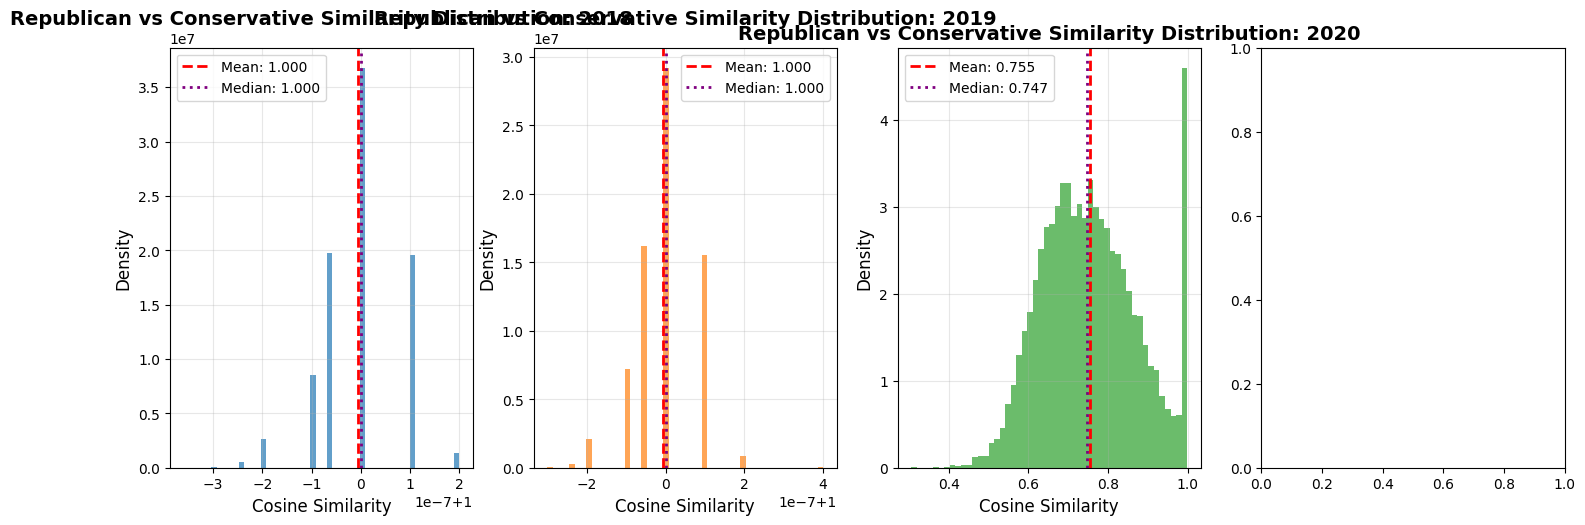

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_similarity_distributions(df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024, subreddit1, subreddit2):
    """Analyze how cosine similarity distributions change over time"""
    
    # Prepare data
    dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
    period_names = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
    
    # Create the plot
    plt.figure(figsize=(18, 12))
    
    # Main distribution plots
    for i, (df, period) in enumerate(zip(dataframes, period_names)):
        plt.subplot(2, 4, i+1)
        
        # Create histogram
        plt.hist(df['similarity'], bins=50, alpha=0.7, density=True, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])
        
        # Add statistics
        mean_sim = df['similarity'].mean()
        std_sim = df['similarity'].std()
        median_sim = df['similarity'].median()
        
        plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_sim:.3f}')
        plt.axvline(median_sim, color='purple', linestyle=':', linewidth=2,
                   label=f'Median: {median_sim:.3f}')

        plt.title(f'{subreddit1} vs {subreddit2} Similarity Distribution: {period}', fontsize=14, fontweight='bold')
        plt.xlabel('Cosine Similarity', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # Combined comparison plot
    plt.subplot(2, 4, 8)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, (df, period, color) in enumerate(zip(dataframes, period_names, colors)):
        plt.hist(df['similarity'], bins=30, alpha=0.6, density=True, 
                label=period, color=color)
    
    plt.title('Similarity Distributions Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Cosine Similarity', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"output/v5_yearly/{subreddit1}_{subreddit2}_similarity_distributions.png")
    plt.show()



# Run the analysis
# Read the CSV files
republican_conservative_2018 = pd.read_csv("output/v5_yearly/republican_conservative_2018.csv")
republican_conservative_2019 = pd.read_csv("output/v5_yearly/republican_conservative_2019.csv") 
republican_conservative_2020 = pd.read_csv("output/v5_yearly/republican_conservative_2020.csv")
republican_conservative_2021 = pd.read_csv("output/v5_yearly/republican_conservative_2021.csv")
republican_conservative_2022 = pd.read_csv("output/v5_yearly/republican_conservative_2022.csv")
republican_conservative_2023 = pd.read_csv("output/v5_yearly/republican_conservative_2023.csv")
republican_conservative_2024 = pd.read_csv("output/v5_yearly/republican_conservative_2024.csv")
republican_democrats_2018 = pd.read_csv("output/v5_yearly/democrats_republican_2018.csv")
republican_democrats_2019 = pd.read_csv("output/v5_yearly/democrats_republican_2019.csv")
republican_democrats_2020 = pd.read_csv("output/v5_yearly/democrats_republican_2020.csv")
republican_democrats_2021 = pd.read_csv("output/v5_yearly/democrats_republican_2021.csv")
republican_democrats_2022 = pd.read_csv("output/v5_yearly/democrats_republican_2022.csv")
republican_democrats_2023 = pd.read_csv("output/v5_yearly/democrats_republican_2023.csv")
republican_democrats_2024 = pd.read_csv("output/v5_yearly/democrats_republican_2024.csv")


analyze_similarity_distributions(
    republican_conservative_2018, 
    republican_conservative_2019, 
    republican_conservative_2020, 
    republican_conservative_2021, 
    republican_conservative_2022,
    republican_conservative_2023,
    republican_conservative_2024,
    "Republican", 
    "Conservative"
    )

analyze_similarity_distributions(
    republican_democrats_2018, 
    republican_democrats_2019, 
    republican_democrats_2020, 
    republican_democrats_2021, 
    republican_democrats_2022,
    republican_democrats_2023,
    republican_democrats_2024,
    "Republican", 
    "Democrats"
    )


C:\Users\cyyua\AppData\Local\Temp\ipykernel_28236\1512579515.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(dataframes))


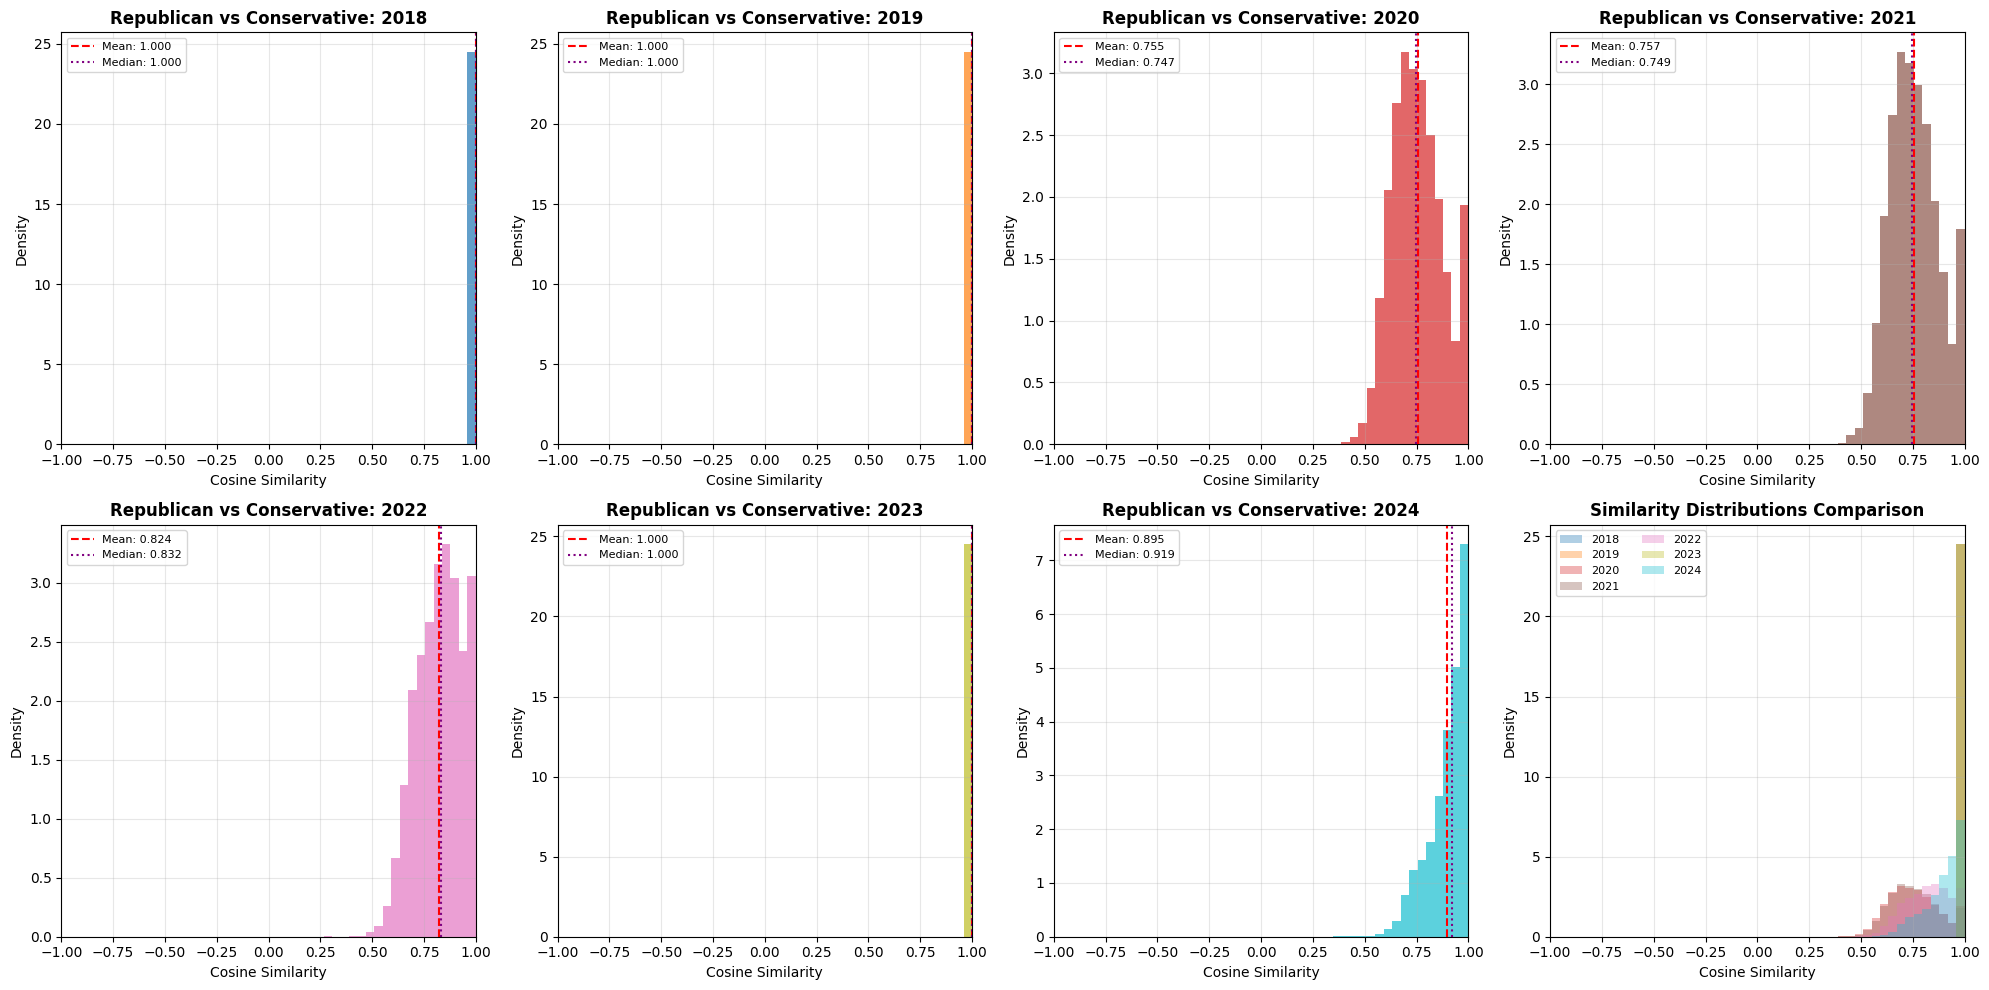

Saved plot to output/v5_yearly\Republican_Conservative_similarity_distributions.png


C:\Users\cyyua\AppData\Local\Temp\ipykernel_28236\1512579515.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(dataframes))


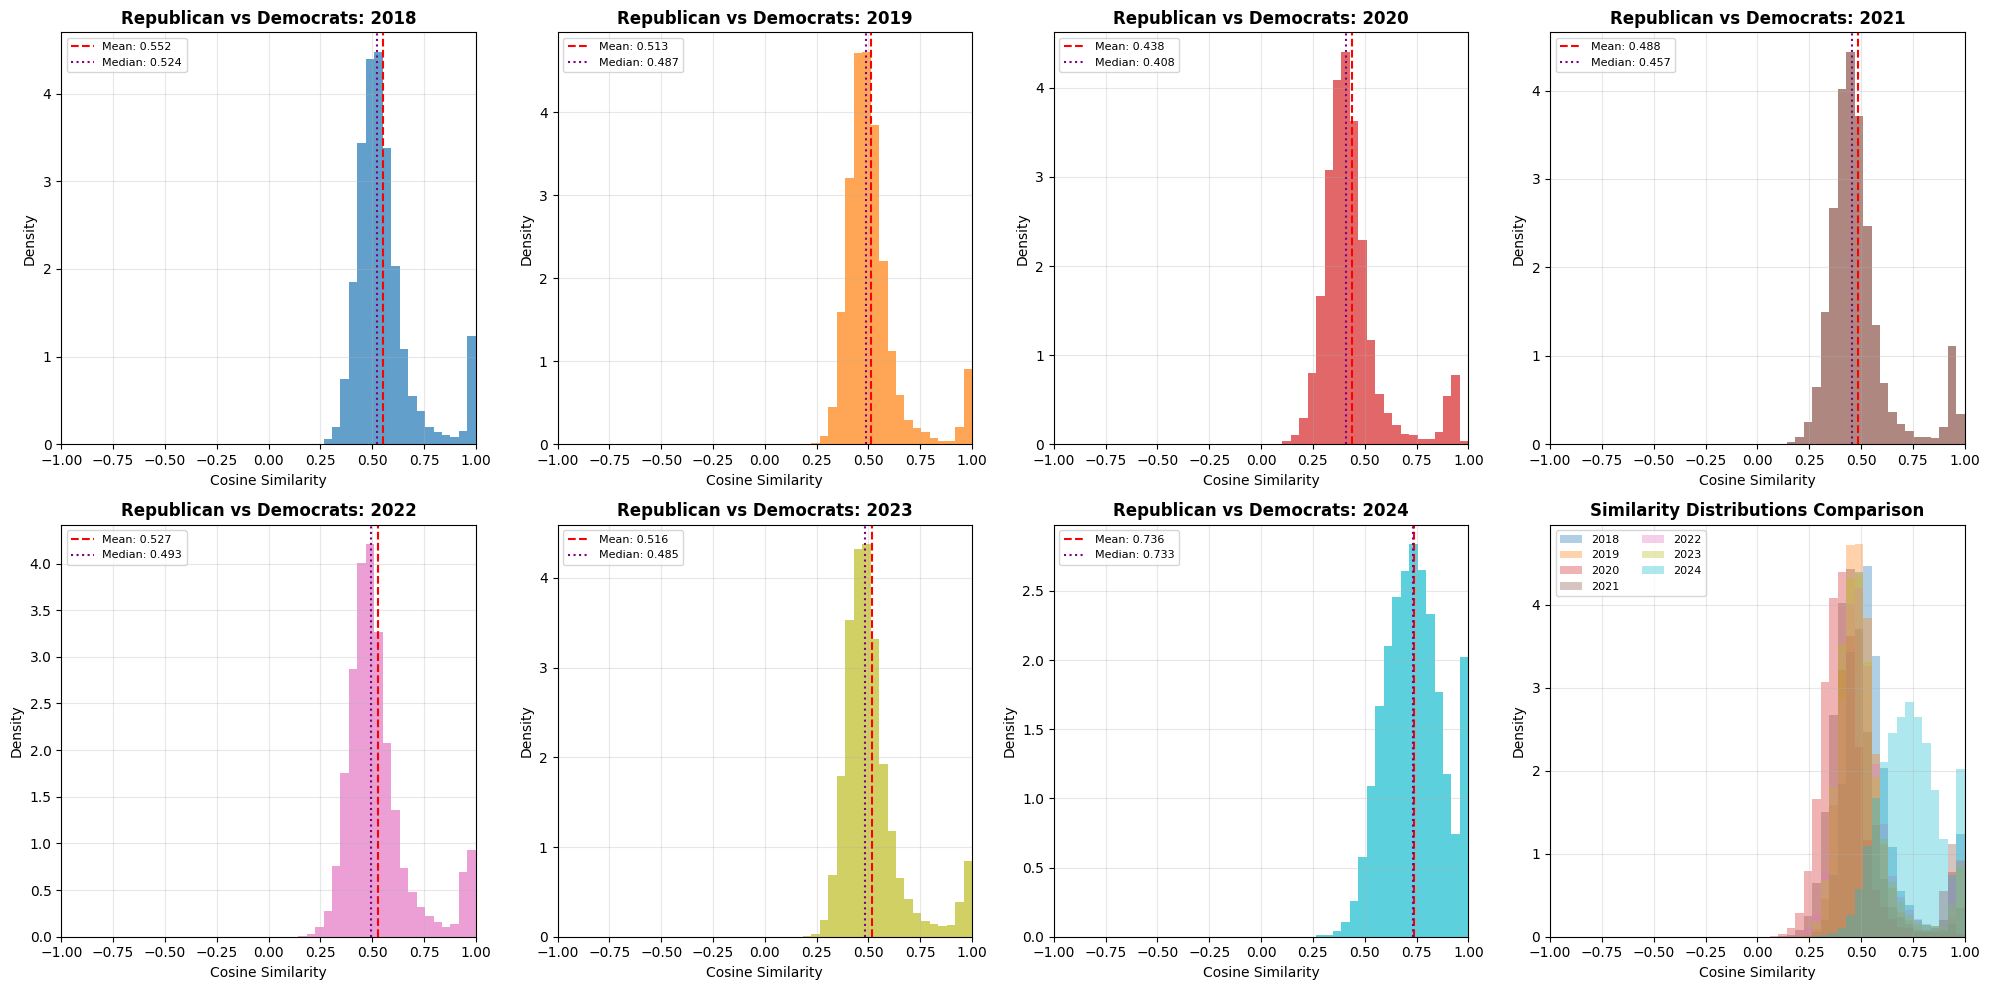

Saved plot to output/v5_yearly\Republican_Democrats_similarity_distributions.png


In [2]:
# ...existing code...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def analyze_similarity_distributions(df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024, subreddit1, subreddit2):
    """Analyze how cosine similarity distributions change over time"""
    
    # Prepare data
    dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
    period_names = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']

    # Build consistent bins across years
    all_vals = np.concatenate([df['similarity'].values for df in dataframes if len(df) > 0])
    bins = np.linspace(min(-1.0, all_vals.min()), max(1.0, all_vals.max()), 50)

    # Colors: one per year from a colormap
    cmap = plt.cm.get_cmap('tab10', len(dataframes))
    colors = [cmap(i) for i in range(len(dataframes))]

    # Create the plot grid (7 single-year plots + 1 combined)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    # Main distribution plots
    for i, (df, period) in enumerate(zip(dataframes, period_names)):
        ax = axes[i]
        ax.hist(df['similarity'], bins=bins, alpha=0.7, density=True, color=colors[i], edgecolor='none')
        
        mean_sim = df['similarity'].mean()
        median_sim = df['similarity'].median()
        
        ax.axvline(mean_sim, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_sim:.3f}')
        ax.axvline(median_sim, color='purple', linestyle=':', linewidth=1.5, label=f'Median: {median_sim:.3f}')

        ax.set_title(f'{subreddit1} vs {subreddit2}: {period}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Cosine Similarity', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.set_xlim(-1, 1)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

    # Combined comparison plot (last subplot)
    ax_combined = axes[7]
    for i, (df, period) in enumerate(zip(dataframes, period_names)):
        ax_combined.hist(df['similarity'], bins=bins, alpha=0.35, density=True, label=period, color=colors[i], edgecolor='none')

    ax_combined.set_title('Similarity Distributions Comparison', fontsize=12, fontweight='bold')
    ax_combined.set_xlabel('Cosine Similarity', fontsize=10)
    ax_combined.set_ylabel('Density', fontsize=10)
    ax_combined.set_xlim(-1, 1)
    ax_combined.legend(ncol=2, fontsize=8)
    ax_combined.grid(True, alpha=0.3)

    fig.tight_layout()

    # Ensure output directory exists and save BEFORE show
    out_dir = "output/v5_yearly"
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.join(out_dir, f"{subreddit1}_{subreddit2}_similarity_distributions.png")
    fig.savefig(out_path, dpi=200, bbox_inches='tight')
    plt.show()
    print(f"Saved plot to {out_path}")
# ...existing code...


# Run the analysis
# Read the CSV files
republican_conservative_2018 = pd.read_csv("output/v5_yearly/republican_conservative_2018.csv")
republican_conservative_2019 = pd.read_csv("output/v5_yearly/republican_conservative_2019.csv") 
republican_conservative_2020 = pd.read_csv("output/v5_yearly/republican_conservative_2020.csv")
republican_conservative_2021 = pd.read_csv("output/v5_yearly/republican_conservative_2021.csv")
republican_conservative_2022 = pd.read_csv("output/v5_yearly/republican_conservative_2022.csv")
republican_conservative_2023 = pd.read_csv("output/v5_yearly/republican_conservative_2023.csv")
republican_conservative_2024 = pd.read_csv("output/v5_yearly/republican_conservative_2024.csv")
republican_democrats_2018 = pd.read_csv("output/v5_yearly/democrats_republican_2018.csv")
republican_democrats_2019 = pd.read_csv("output/v5_yearly/democrats_republican_2019.csv")
republican_democrats_2020 = pd.read_csv("output/v5_yearly/democrats_republican_2020.csv")
republican_democrats_2021 = pd.read_csv("output/v5_yearly/democrats_republican_2021.csv")
republican_democrats_2022 = pd.read_csv("output/v5_yearly/democrats_republican_2022.csv")
republican_democrats_2023 = pd.read_csv("output/v5_yearly/democrats_republican_2023.csv")
republican_democrats_2024 = pd.read_csv("output/v5_yearly/democrats_republican_2024.csv")


analyze_similarity_distributions(
    republican_conservative_2018, 
    republican_conservative_2019, 
    republican_conservative_2020, 
    republican_conservative_2021, 
    republican_conservative_2022,
    republican_conservative_2023,
    republican_conservative_2024,
    "Republican", 
    "Conservative"
    )

analyze_similarity_distributions(
    republican_democrats_2018, 
    republican_democrats_2019, 
    republican_democrats_2020, 
    republican_democrats_2021, 
    republican_democrats_2022,
    republican_democrats_2023,
    republican_democrats_2024,
    "Republican", 
    "Democrats"
    )
